In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gensim.downloader as api
from scipy.io import loadmat
from umap import UMAP
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [3]:
mnist_x, mnist_y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
fmnist_x, fmnist_y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)
w2v = api.load('word2vec-google-news-300')
coil_20 = loadmat('coil-20.mat')
coil_20_x = coil_20['X']
coil_20_y = coil_20['Y']
gnews_x = w2v.vectors[:300000]
gnews_y = []

In [4]:
pca = PCA(n_components=2)
svd = TruncatedSVD(n_components=2)
tsne = TSNE(n_components=2)
umap = UMAP(n_components=2)

In [5]:
data = [
    (mnist_x, mnist_y, 'MNIST'),
    (fmnist_x, fmnist_y, 'Fashion-MNIST'),
    (coil_20_x, coil_20_y, 'COIL-20'),
    (gnews_x, gnews_y, 'Google News')
]

models = [
    (pca, 'PCA'),
    (svd, 'SVD'),
    (tsne, 't-SNE'),
    (umap, 'UMAP')
]

In [6]:
from tqdm import tqdm

4it [1:28:08, 1322.11s/it]


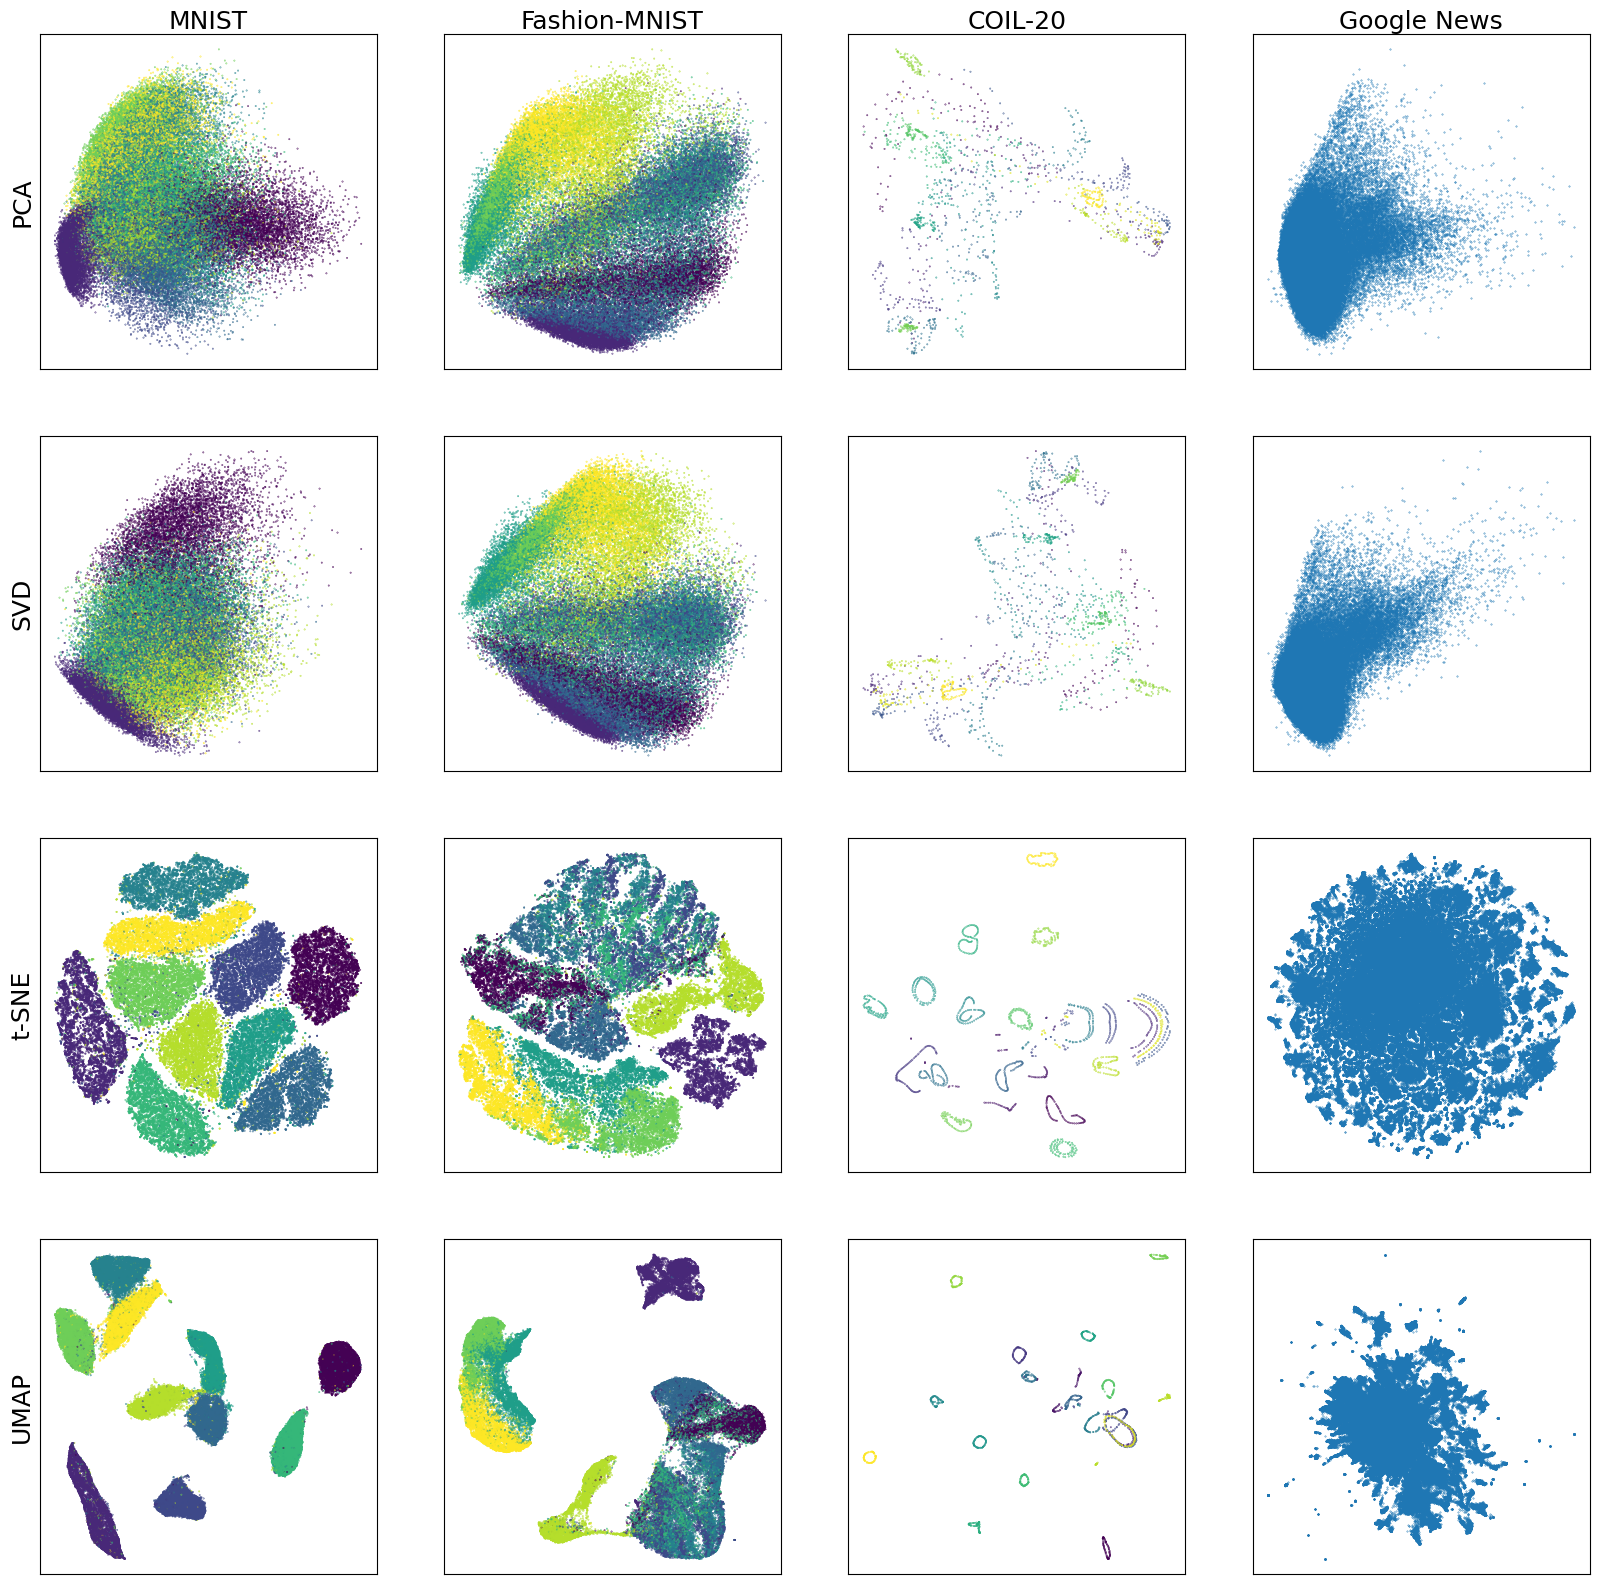

In [7]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i, (model, m_name) in tqdm(enumerate(models)):
    for j, (x, y, d_name) in enumerate(data):
        if i == 0:
            axs[i, j].set_xlabel(f'{d_name}', fontsize=18) 
            axs[i, j].xaxis.set_label_position('top') 
        if j == 0:
            axs[i, j].set_ylabel(f'{m_name}', fontsize=18)
        train = model.fit_transform(x)
        if d_name == 'Google News':
            axs[i, j].scatter(train[:, 0], train[:, 1], s=0.1)
        else:
            axs[i, j].scatter(train[:, 0], train[:, 1], c=y.astype(int), s=0.1)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

plt.show()